<a href="https://colab.research.google.com/github/Jay06eng/Machine-Learning/blob/main/LEC_6_SQL_and_Colab_through_sqlite_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SQL and Colab through sqlite library

Note: If problem occurs running this installation code might help


```
!pip install db-sqlite3
!pip install ipython sql
```



In [ ]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1770 sha256=f5a4e3a48d7e6d5dca7c44e88bb5f2e4465f85f9986cfb978ebdefaeac46fc54
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3875 sha256=6447082b67192fc3505eeb58584923fe5b88fcbf8e926cfcd1426dc644985f77
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31663 sha256=4f80969394b4ed1cf215647c51a97bb100b9707e6187c2855d1d9988ab956f53
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [ ]:
!pip install ipython sql

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
  Created wheel for sql: filename=sql-2022.4.0-py3-none-any.whl size=4306 sha256=095acfe6e2eeb4fc30b0f295f4a4081753820216e4209df7ebf7de747df2a695
  Stored in directory: /root/.cache/pip/wheels/7d/0c/6c/d177cf58d1d794fb4cd8d9d07ba89451040e7d6d1c1e01b9d9
Successfully built sql


##**Importing the library and csv**

In [ ]:
import sqlite3

import pandas as pd

In [ ]:
df = pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


##**Connect to a sqlite database**

In [ ]:
conn = sqlite3.connect('cereal_database.db')

*.connect('cereal_database.db')* <br>

This function is part of the sqlite3 module and is used to connect to a SQLite database file. In this case, it's connecting to a database file named 'cereal_database.db'. If the file doesn't exist, SQLite will create it.

##**Add dataframe df into sql database**

In [ ]:
# Use the pandas to_sql method to insert the DataFrame into an SQLite table
df.to_sql('cereal_table', conn, index=False, if_exists='replace')
# 'replace' will recreate the table if it exists

77

**'cereal_table'**: This is the name of the SQLite table where you want to insert the data.
<br>
<br>
**conn**: This is the SQLite database connection object (sqlite3.Connection) that you established earlier.
<br><br>
**index=False**: This parameter specifies whether to include the DataFrame index as a separate column in the database table. Setting it to False means that the index won't be included.
<br><br>
**if_exists='replace'**: This parameter determines what to do if the specified table already exists in the database. In this case, it's set to 'replace', which means that if the table already exists, it will be replaced with the new data. Other options for the if_exists parameter include 'fail' (do nothing if the table already exists) and 'append' (add new data to the existing table).

##**Checking existing tables**

In [ ]:
# Get the list of tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables

,name
0,cereal_table


##**Checking column names**

cid: Column ID, a unique identifier for the column within the table.

name: The name of the column.

type: The declared data type of the column (e.g., INTEGER, TEXT, REAL).

notnull: A flag indicating whether the column has a NOT NULL constraint (1 for NOT NULL, 0 otherwise). This constraint ensures that the column cannot store NULL values, enforcing the presence of a value in that column for every row in the table.

dflt_value: The default value for the column, if any.

pk: A flag indicating whether the column is part of the primary key (1 if it is part of the primary key, 0 otherwise).

In [ ]:
query = "PRAGMA table_info('cereal_table') ;"
columns = pd.read_sql_query(query, conn)
columns

,cid,name,type,notnull,dflt_value,pk
0,0,name,TEXT,0,None,0
1,1,mfr,TEXT,0,None,0
2,2,type,TEXT,0,None,0
3,3,calories,INTEGER,0,None,0
4,4,protein,INTEGER,0,None,0
5,5,fat,INTEGER,0,None,0
6,6,sodium,INTEGER,0,None,0
7,7,fiber,REAL,0,None,0
8,8,carbo,REAL,0,None,0
9,9,sugars,INTEGER,0,None,0


cid: Column ID, a unique identifier for the column within the table.

name: The name of the column.

type: The declared data type of the column (e.g., INTEGER, TEXT, REAL).

notnull: A flag indicating whether the column has a NOT NULL constraint (1 for NOT NULL, 0 otherwise). This constraint ensures that the column cannot store NULL values, enforcing the presence of a value in that column for every row in the table.

dflt_value: The default value for the column, if any.

pk: A flag indicating whether the column is part of the primary key (1 if it is part of the primary key, 0 otherwise).

##**Checking unique observations**

In [ ]:
query = "SELECT DISTINCT mfr FROM cereal_table;"
unique_values = pd.read_sql_query(query, conn)
unique_values

,mfr
0,N
1,Q
2,K
3,R
4,G
5,P
6,A


EXAMPLE QUERY:

In [ ]:
query = '''SELECT name,
  mfr,
  calories,
  AVG(calories) AS average_calories
FROM cereal_table
GROUP BY name;'''
Average_Calories = pd.read_sql_query(query, conn)
Average_Calories

,name,mfr,calories,average_calories
0,100% Bran,N,70,70.0
1,100% Natural Bran,Q,120,120.0
2,All-Bran,K,70,70.0
3,All-Bran with Extra Fiber,K,50,50.0
4,Almond Delight,R,110,110.0
...,...,...,...,...
72,Triples,G,110,110.0
73,Trix,G,110,110.0
74,Wheat Chex,R,100,100.0
75,Wheaties,G,100,100.0


If you want to know the average calories for each mfr, you run this query:

In [ ]:
query_6 = '''
SELECT mfr,
type,
AVG(calories) AS avg_calories
FROM cereal_table
GROUP BY mfr;'''
query_6

'\nSELECT mfr,\ntype,\nAVG(calories) AS avg_calories\nFROM cereal_table\nGROUP BY mfr;'

In [ ]:
Average_Calories_2 = pd.read_sql_query(query_6, conn)
Average_Calories_2

,mfr,type,avg_calories
0,A,H,100.000000
1,G,C,111.363636
2,K,C,108.695652
3,N,C,86.666667
4,P,C,108.888889
5,Q,C,95.000000
6,R,C,115.000000


In [ ]:
query_7 = '''
SELECT mfr,
type,
AVG(calories) AS avg_calories
FROM cereal_table
GROUP BY mfr, type;'''
Average_Calories = pd.read_sql_query(query_7, conn)
Average_Calories

,mfr,type,avg_calories
0,A,H,100.000000
1,G,C,111.363636
2,K,C,108.695652
3,N,C,84.000000
4,N,H,100.000000
5,P,C,108.888889
6,Q,C,94.285714
7,Q,H,100.000000
8,R,C,115.000000


If you want to know the unique pair of mfr and type, you run this query:

In [ ]:
query= '''
SELECT DISTINCT mfr,
type
FROM cereal_table;'''

pd.read_sql_query(query, conn)

,mfr,type
0,N,C
1,Q,C
2,K,C
3,R,C
4,G,C
5,P,C
6,N,H
7,A,H
8,Q,H




```
SELECT mfr,
       type,
       AVG(calories) AS avg_calories
FROM cereal_table
GROUP BY mfr, type;

```

This groups the data by both mfr and type.

The result will show the average calories for each unique combination of manufacturer and cereal type.



```
SELECT mfr,
       type,
       AVG(calories) AS avg_calories
FROM cereal_table
GROUP BY mfr;

```

This groups the data only by mfr (manufacturer).

SQL will return one row per manufacturer, showing the overall average calories of all their cereals.

However, including type in the SELECT without grouping or aggregating it can cause an error in strict SQL modes (like PostgreSQL or standard-compliant engines).

**Important Note:** SQLite (which pd.read_sql_query usually uses) allows this and returns an arbitrary type per group, but it's not standard SQL behavior.



##CHALLENGE 1
From the codes we already know,
1. add the Average_Calories table to cereal_database.db
2. confirm if we have successfully added it

##**Adding table to the database**

In [ ]:
Average_Calories.to_sql('Average_Calories', conn, index=False,
                        if_exists='replace')

77

##ALTERING COLUMN NAMES

*NOTE: SQLite has no alter column names option, when column names has to be changed, we can either do that first during datacleaning with python, or directly copy each columns in the table then using the code below for the column to be changed:*

<br>
Also, when you want the change to reflect, the table must be replaced with the updated table due to SQLite's lack of support on updating column names.

```
old_column_name AS new_column_name,
```



In [ ]:
# Create a new table with the updated column names
query = '''
    SELECT
        name,
        mfr,
        type,
        calories,
        protein,
        fat,
        sodium,
        fiber,
        carbo,
        sugars,
        Potass AS Potassium,
        vitamins,
        shelf,
        weight,
        cups,
        rating
    FROM cereal_table;
'''

table_column_change = pd.read_sql_query(query, conn)
table_column_change

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,Potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


###Checking column names again

In [ ]:
query = "PRAGMA table_info('cereal_table') ;"
columns = pd.read_sql_query(query, conn)
columns

,cid,name,type,notnull,dflt_value,pk
0,0,name,TEXT,0,None,0
1,1,mfr,TEXT,0,None,0
2,2,type,TEXT,0,None,0
3,3,calories,INTEGER,0,None,0
4,4,protein,INTEGER,0,None,0
5,5,fat,INTEGER,0,None,0
6,6,sodium,INTEGER,0,None,0
7,7,fiber,REAL,0,None,0
8,8,carbo,REAL,0,None,0
9,9,sugars,INTEGER,0,None,0


We have seen that the column name has been replaced awhile ago, but when we check it, it is back to what it was.

## OPTION 1: Creating an updated table:

In [ ]:
# Create a new table with the updated column names
query = ''' CREATE TABLE cereal_table_new AS
    SELECT
        name,
        mfr,
        type,
        calories,
        protein,
        fat,
        sodium,
        fiber,
        carbo,
        sugars,
        Potass AS Potassium,
        vitamins,
        shelf,
        weight,
        cups,
        rating
    FROM cereal_table;
'''
conn.execute(query)

Conn.execute():

It's used for executing SQL commands that modify the database schema or manipulate data directly. For example, commands like CREATE TABLE, INSERT, UPDATE, DELETE, and DROP TABLE are executed using conn.execute. These commands can add, modify, or delete data in the database, and they can also change the structure of the database by creating, altering, or dropping tables.

So, when you use conn.execute to execute such commands, you are directly instructing the database to make changes, and those changes will persist in the database after the commands are executed.

In [ ]:
# Get the list of tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables

,name
0,cereal_table
1,Average_Calories
2,cereal_table_new


From there we can just drop the old table since we have a copy of an updated column

While dropping, we have to execute a SQL COMMAND. When executing, you can either use cursor.execute() or conn.execute()

**conn.execute()**
<br>
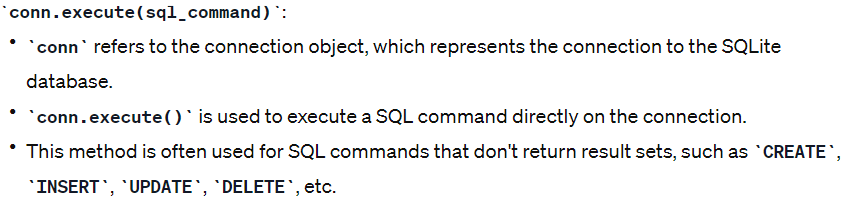

```
import sqlite3

# Establish a connection to the SQLite database
conn = sqlite3.connect('example.db')

# Execute a SQL command directly on the connection
conn.execute('CREATE TABLE example_table (id INTEGER, name TEXT);')

# Commit the changes to the database
conn.commit()

# Close the connection
conn.close()


```



In [ ]:
conn.execute('DROP TABLE IF EXISTS cereal_table;')

In [ ]:
# Get the list of tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables

,name
0,Average_Calories
1,cereal_table_new


In [ ]:
query = "PRAGMA table_info('cereal_table_new') ;"
columns = pd.read_sql_query(query, conn)
columns

,cid,name,type,notnull,dflt_value,pk
0,0,name,TEXT,0,None,0
1,1,mfr,TEXT,0,None,0
2,2,type,TEXT,0,None,0
3,3,calories,INT,0,None,0
4,4,protein,INT,0,None,0
5,5,fat,INT,0,None,0
6,6,sodium,INT,0,None,0
7,7,fiber,REAL,0,None,0
8,8,carbo,REAL,0,None,0
9,9,sugars,INT,0,None,0


#**CELL MAGIC**
<br>
When you just want to use collab for pure SQL and you don't need the extra steps to create and display objects, we can use this.

In [ ]:
df = pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
conn = sqlite3.connect('cereal_database.db')

In [ ]:


# Use the pandas to_sql method to insert the DataFrame into an SQLite table
df.to_sql('cereal_table', conn, index=False, if_exists='replace')
# 'replace' will recreate the table if it exists

77

In [ ]:
%load_ext sql
%sql sqlite:///cereal_database.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
%%sql

SELECT name,
  mfr,
  calories,
  AVG(calories) AS average_calories
FROM cereal_table
GROUP BY name;

 * sqlite:///cereal_database.db
Done.


name,mfr,calories,average_calories
100% Bran,N,70,70.0
100% Natural Bran,Q,120,120.0
All-Bran,K,70,70.0
All-Bran with Extra Fiber,K,50,50.0
Almond Delight,R,110,110.0
Apple Cinnamon Cheerios,G,110,110.0
Apple Jacks,K,110,110.0
Basic 4,G,130,130.0
Bran Chex,R,90,90.0
Bran Flakes,P,90,90.0
